In [ ]:
import pandas as pd
import plotly.express as px

In [2]:
# Define the column names for the UNSW-NB15 dataset
column_names = [
    'srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl',
    'sloss', 'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb',
    'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime', 'ltime', 'sinpkt',
    'dinpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
    'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
    'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label'
]

#Load the datasets without headers
df1 = pd.read_csv('Datasets/UNSW-NB15/UNSW-NB15_1.csv', header=None, names=column_names, low_memory=False)
df2 = pd.read_csv('Datasets/UNSW-NB15/UNSW-NB15_2.csv', header=None, names=column_names, low_memory=False)
df3 = pd.read_csv('Datasets/UNSW-NB15/UNSW-NB15_3.csv', header=None, names=column_names, low_memory=False)
df4 = pd.read_csv('Datasets/UNSW-NB15/UNSW-NB15_4.csv', header=None, names=column_names, low_memory=False)

#Combine into one dataframe
df = pd.concat([df1, df2, df3, df4])

print(df.shape)
print(df.head())

(2540047, 49)
        srcip  sport          dstip dsport proto state       dur  sbytes  \
0  59.166.0.0   1390  149.171.126.6     53   udp   CON  0.001055     132   
1  59.166.0.0  33661  149.171.126.9   1024   udp   CON  0.036133     528   
2  59.166.0.6   1464  149.171.126.7     53   udp   CON  0.001119     146   
3  59.166.0.5   3593  149.171.126.5     53   udp   CON  0.001209     132   
4  59.166.0.3  49664  149.171.126.0     53   udp   CON  0.001169     146   

   dbytes  sttl  ...  ct_ftp_cmd  ct_srv_src  ct_srv_dst ct_dst_ltm  \
0     164    31  ...           0           3           7          1   
1     304    31  ...           0           2           4          2   
2     178    31  ...           0          12           8          1   
3     164    31  ...           0           6           9          1   
4     178    31  ...           0           7           9          1   

   ct_src_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  attack_cat  \
0           3        

<class 'pandas.core.frame.DataFrame'>
Index: 2540047 entries, 0 to 440043
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit              fl

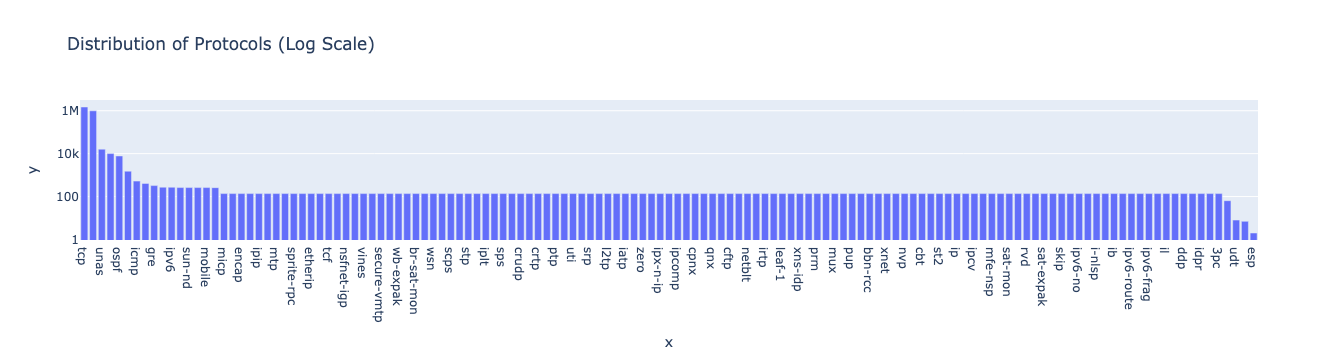

In [ ]:
# Exploratory Data Analysis
print(df.info())

# Plotly visualization of the 'proto' column

proto_counts = df['proto'].value_counts()
fig = px.bar(x=proto_counts.index, y=proto_counts.values, title='Distribution of Protocols (Log Scale)', log_y = True)
fig.show()

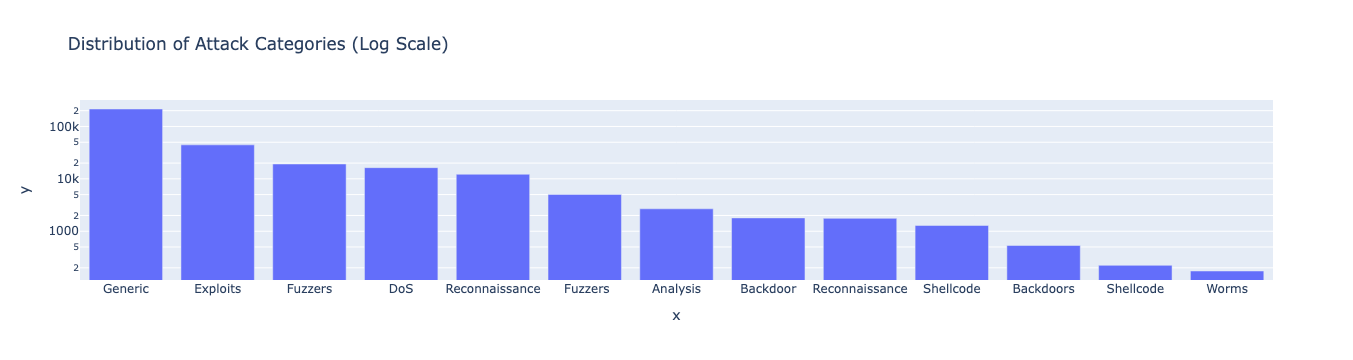

In [6]:
# Plotly visualization of the 'attack_cat' column
proto_counts = df['attack_cat'].value_counts()
fig = px.bar(x=proto_counts.index, y=proto_counts.values, title='Distribution of Attack Categories (Log Scale)', log_y = True)
fig.show()

In [ ]:
label_counts = df['label'].value_counts()
print("Traffic Distributions")
print(label_counts)
print("\n0 = Normal, 1 = Attack")

# Plotly visualization of the the Traffic Distributions 
label_df = label_counts.reset_index()

Traffic Distributions
label
0    2218764
1     321283
Name: count, dtype: int64

0 = Normal, 1 = Attack


In [ ]:
#Visualization of distribution of traffic
label_df = label_counts.reset_index()
label_df['label_name'] = label_df['label'].apply(lambda x: 'Attack' if x == 1 else 'Normal')
fig = px.pie(label_df,
             values='count',
             names='label_name',
             title='Distribution of Normal vs. Attack Traffic',
             color_discrete_map={'Normal':'lightcyan',
                                 'Attack':'darkorange'})
fig.show()